In [128]:
import numpy as np
import matplotlib.pyplot as plt
import scipy    
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def readfile(filename):
    atom_vec = []
    for r in open(filename):
        if not r[0] in ('I','#','0','\n'):
            r = r[:-1]
            #print(r)
            tuples = [float(y) for y in r.split(" ")]
            #print(tuples)
            atom_vec.append(tuples)
    return atom_vec


In [ ]:
veclist = []
for i in range(1,6):
    veclist.append(readfile("2x_0.00"+str(i)+"_disps_sorted.dump"))

In [4]:
def reshape_data(atomvec):
    frame_count=0
    atom_vec_arr=[]
    
    for i in atomvec:
        if len(i)==1 or len(i)==3:
            frame_count=frame_count+1
        if len(i)==6:
            atom_vec_arr.append(i)


    frame_count=frame_count/5

    frame_count=int(frame_count)


    atom_vec_arr = np.array(atom_vec_arr)

    atom_dat=np.reshape(atom_vec_arr,(frame_count,len(atom_vec_arr)//frame_count,len(atom_vec_arr[0])))

    return atom_dat

In [101]:
sims_data = []

for i in veclist:
    a = reshape_data(i)
    #a = a[a[:, 0].argsort()]
    sims_data.append(a)

In [102]:
print(sims_data[0][0])

[[7.4250e+03 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.5129e+04 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.5573e+04 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [6.8670e+03 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.7593e+04 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [8.5780e+03 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]


In [103]:
x2_001_disps = sims_data[0][1000]
x2_002_disps = sims_data[1][1000]
x2_003_disps = sims_data[2][1000]
x2_004_disps = sims_data[3][1000]
x2_005_disps = sims_data[4][1000]


In [108]:
print(x2_001_disps[:,2])

[ 4.29300e-01  1.22940e+00  5.57000e-01 -3.86600e-01 -1.80900e-01
 -1.18300e-01 -3.54030e+00 -4.73600e-01 -1.27900e-01 -1.63640e+00
 -1.57980e+00  3.52280e+00 -7.32300e-01  1.82970e+00 -9.79600e-01
 -1.45000e-01 -1.59930e+00 -8.30400e-01  1.15530e+00 -1.19960e+00
 -3.35390e+00  2.84390e+00  2.24630e+00 -7.60000e-02  3.63650e+00
 -7.81600e-01 -1.26030e+00  3.77260e+00  7.52700e-01  1.59450e+00
 -5.55500e-01 -3.27900e-01  8.23700e-01  7.93300e-01  8.42700e-01
 -3.17490e+00 -2.27130e+00 -8.41200e-01 -1.91250e+00  1.32100e-01
  2.06090e+00  1.21240e+00 -2.05490e+00  1.51100e+00 -1.34430e+00
  2.43570e+00  2.41930e+00  3.49200e-01 -2.71900e+00  1.61820e+00
  1.15480e+00  9.45900e-01  3.43300e-01  8.04200e-01  3.79000e-01
  5.65500e-01 -8.58000e-02  2.39270e+00 -1.36800e+00  3.21500e-01
 -3.24490e+00  1.47250e+00 -1.44840e+00  3.79000e-01  6.84200e-01
  4.10670e+00  3.48080e+00 -3.85800e-01 -1.25330e+00  1.53870e+00
  1.19910e+00  4.19800e-01 -1.15880e+00 -2.20900e-01  3.56130e+00
  3.50200e

In [115]:
d0_1_2x_disps = x2_001_disps[:,2]
d0_2_2x_disps = x2_002_disps[:,2]
d0_3_2x_disps = x2_003_disps[:,2]
d0_4_2x_disps = x2_004_disps[:,2]
d0_5_2x_disps = x2_005_disps[:,2]

In [131]:
ledat = [d0_1_2x_disps,d0_2_2x_disps,d0_3_2x_disps,d0_4_2x_disps,d0_5_2x_disps]
lbl = ["0.001","0.002","0.003","0.004","0.005"]

In [125]:
data_array = np.array(ledat)

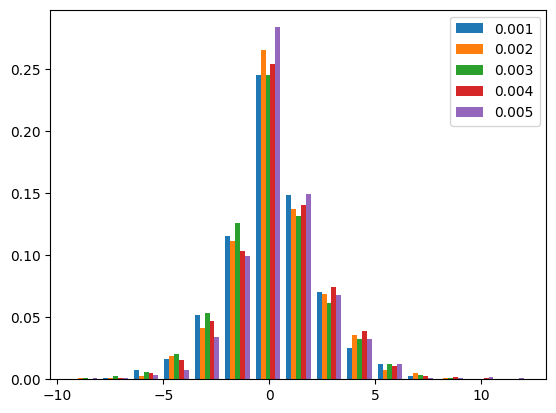

In [147]:
out = plt.hist(ledat,bins=15,density=True,stacked=False,label=lbl)
plt.legend()


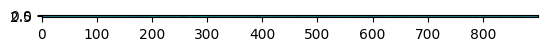

In [142]:
plt.imshow(ledat)

In [136]:
print(np.histogram(ledat))

(array([   6,   36,  237,  877, 2136,  896,  263,   40,    6,    3],
      dtype=int64), array([-9.4045 , -7.24633, -5.08816, -2.92999, -0.77182,  1.38635,
        3.54452,  5.70269,  7.86086, 10.01903, 12.1772 ]))


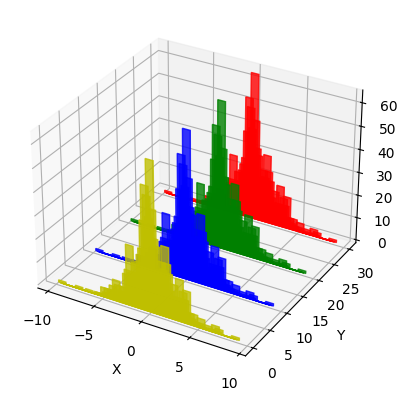

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 100
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    ys = ledat[1]

    hist, bins = np.histogram(ys, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [124]:
print(out[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00102968 0.         0.
  0.         0.         0.         0.00102968 0.00205936 0.00205936
  0.00102968 0.00411872 0.00308904 0.00205936 0.00205936 0.00308904
  0.00205936 0.00617807 0.00514839 0.01235615 0.01235615 0.01338583
  0.00720775 0.00823743 0.01029679 0.00926711 0.02368262 0.02265294
  0.02883101 0.02162326 0.02986069 0.02059358 0.02265294 0.04839491
  0.06075106 0.06795881 0.05045427 0.05251363 0.03192005 0.03706844
  0.03089037 0.02162326 0.03706844 0.03603876 0.01853422 0.02059358
  0.02368262 0.01029679 0.01235615 0.01235615 0.01132647 0.01132647
  0.01235615 0.00823743 0.00308904 0.00308904 0.00205936 0.00411872
  0.00102968 0.00411872 0.00720775 0.00205936 0.00102968 0.00102968
  0.00102968 0.00102968 0.         0.00102968 0.00102968 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.     